In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes_df = pd.read_csv("E:/Data/pima-indians-diabetes.csv", sep = ',')

In [3]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Data Manipulation

In [4]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes = diabetes_df.drop(['Pregnancies', 'Outcome'], axis = 1)

In [7]:
diabetes.replace(0, np.nan, inplace=True)

In [8]:
diabetes.isnull().sum().sort_values()

DiabetesPedigreeFunction      0
Age                           0
Glucose                       5
BMI                          11
BloodPressure                35
SkinThickness               227
Insulin                     374
dtype: int64

#### Reaplce missing values by central tendency

In [9]:
diabetes['Insulin'].unique()

array([ nan,  94., 168.,  88., 543., 846., 175., 230.,  83.,  96., 235.,
       146., 115., 140., 110., 245.,  54., 192., 207.,  70., 240.,  82.,
        36.,  23., 300., 342., 304., 142., 128.,  38., 100.,  90., 270.,
        71., 125., 176.,  48.,  64., 228.,  76., 220.,  40., 152.,  18.,
       135., 495.,  37.,  51.,  99., 145., 225.,  49.,  50.,  92., 325.,
        63., 284., 119., 204., 155., 485.,  53., 114., 105., 285., 156.,
        78., 130.,  55.,  58., 160., 210., 318.,  44., 190., 280.,  87.,
       271., 129., 120., 478.,  56.,  32., 744., 370.,  45., 194., 680.,
       402., 258., 375., 150.,  67.,  57., 116., 278., 122., 545.,  75.,
        74., 182., 360., 215., 184.,  42., 132., 148., 180., 205.,  85.,
       231.,  29.,  68.,  52., 255., 171.,  73., 108.,  43., 167., 249.,
       293.,  66., 465.,  89., 158.,  84.,  72.,  59.,  81., 196., 415.,
       275., 165., 579., 310.,  61., 474., 170., 277.,  60.,  14.,  95.,
       237., 191., 328., 250., 480., 265., 193.,  7

In [10]:
np.round(diabetes['Insulin'].mean())

156.0

In [11]:
diabetes['Insulin'].replace(np.nan, np.round(diabetes['Insulin'].mean()), inplace=True)

#### Imputation - SimpleImputer

In [12]:
from sklearn.impute import SimpleImputer
# strategy = mean, median, most-frequent
imputer = SimpleImputer(strategy='median')

In [13]:
X_data = imputer.fit_transform(diabetes)
X_data

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,  29.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,  29.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [14]:
diabetes_df2 = pd.DataFrame(X_data, columns = diabetes.columns)
diabetes_df2

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,156.0,33.6,0.627,50.0
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0
2,183.0,64.0,29.0,156.0,23.3,0.672,32.0
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,122.0,70.0,27.0,156.0,36.8,0.340,27.0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,126.0,60.0,29.0,156.0,30.1,0.349,47.0


In [15]:
diabetes_df2['Pregnancies'] = diabetes_df.Pregnancies
diabetes_df2['Outcome'] = diabetes_df.Outcome

#### Output Distribution 

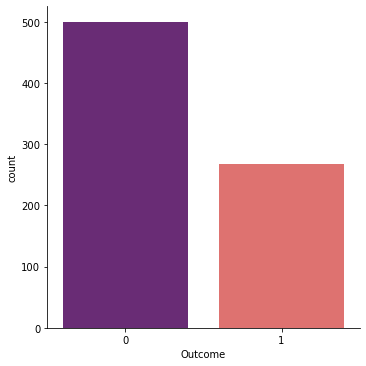

In [16]:
sns.catplot(x = 'Outcome', kind = 'count', data = diabetes_df2, palette='magma')

#### Cross Validation

In [17]:
X = diabetes_df2.drop(['Outcome'], axis = 1)
Y = diabetes_df2['Outcome']

In [18]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

#### AdaBoostClassifier

In [19]:
from sklearn.ensemble import AdaBoostClassifier
# n_estimators = Number of Trees, max_iter = Number of Iterations
AB_model = AdaBoostClassifier(n_estimators=30, random_state=7)

In [20]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(AB_model, X, Y, cv = kfold)

In [21]:
results.mean()

0.7552631578947369

#### Gradient Boosting Classifier

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier(n_estimators = 120, random_state = 7)

In [23]:
results = cross_val_score(GB_model, X, Y, cv = kfold)

In [24]:
results.mean()

0.7708988380041012

#### Xboost

In [26]:
from xgboost import XGBClassifier

In [27]:
XG_model = XGBClassifier()

In [28]:
results = cross_val_score(XG_model, X, Y, cv = kfold)

In [29]:
results.mean()

0.7356288448393712